In [1]:
import sys 
!{sys.executable} -m pip install pymongo

In [1]:
import pymongo

In [2]:
col = pymongo.MongoClient()["dsatni"]['dsa201']
col.count()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


10000

In [4]:
#Prerequisite
import sys
import re
!{sys.executable} -m pip install tweepy
!{sys.executable} -m pip install pymongo
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install stop_words
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install textblob
!{sys.executable} -m pip install googletrans
!{sys.executable} -m pip install py_translator==2.1.9
!{sys.executable} -m pip install emoji
!{sys.executable} -m pip install ipywidgets
!{sys.executable} -m pip install sklearn
#Above code is for running for the first time. Uncomment and execute them

ERROR: Could not find a version that satisfies the requirement py_translator==2.1.9 (from versions: none)
ERROR: No matching distribution found for py_translator==2.1.9


In [3]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime

%matplotlib inline

In [4]:
api_key = "R2s9pXC4NLx5n954z7k5qQn82" # <---- Add your API Key
api_secret = "n0gzwMCGI8Yzba6hwPi3viJ5gUFVP6AfbblgkLm2WkBnvJTroF" # <---- Add your API Secret
access_token = "1227136490527789056-m11DAvawSK7gY9H9Pnef6sYlHPlkVF" # <---- Add your access token
access_token_secret = "0dzjR3LNSin4oIGyGJhSabtLPQRMKgyTvsfsZaukah4X8" # <---- Add your access token secret

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
col = pymongo.MongoClient()["dsatni"]["dsa201"]
col.count()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  # This is added back by InteractiveShellApp.init_path()


10000

In [5]:
class MyStreamListener(tweepy.StreamListener):
    
    counter = 0
    
    def __init__(self, max_tweets=5000, *args, **kwargs):
        self.max_tweets = max_tweets
        self.counter = 0
        super().__init__(*args, **kwargs)
    
    def on_connect(self):
        self.counter = 0
        self.start_time = datetime.now()
    
    def on_status(self, status):
        # Increment counter
        self.counter += 1
        
        # Store tweet to MongoDB
        col.insert_one(status._json)
        
        
        if self.counter % 1 == 0:
            value = int(100.00 * self.counter / self.max_tweets)
            mining_time = datetime.now() - self.start_time
            progress_bar.value = value
            html_value = """<span class="label label-primary">Tweets/Sec: %.1f</span>""" % (self.counter / max([1,mining_time.seconds]))
            html_value += """ <span class="label label-success">Progress: %.1f%%</span>""" % (self.counter / self.max_tweets * 100.0)
            html_value += """ <span class="label label-info">ETA: %.1f Sec</span>""" % ((self.max_tweets - self.counter) / (self.counter / max([1,mining_time.seconds])))
            wgt_status.value = html_value
            # print("%s/%s" % (self.counter, self.max_tweets))
            if self.counter >= self.max_tweets:
                myStream.disconnect()
                print("Finished")
                print("Total Mining Time: %s" % (mining_time))
                print("Tweets/Sec: %.1f" % (self.max_tweets / mining_time.seconds))
                progress_bar.value = 0
                
    
myStreamListener = MyStreamListener(max_tweets=5000)
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
keywords = ["2020",
            "Trump","Biden",]

# Visualize a progress bar to track progress
progress_bar = wgt.IntProgress(value=0)
display(progress_bar)
wgt_status = wgt.HTML(value="""<span class="label label-primary">Tweets/Sec: 0.0</span>""")
display(wgt_status)

# Start a filter with an error counter of 20
for error_counter in range(20):
    try:
        myStream.filter(track=keywords)
        print("Tweets collected: %s" % myStream.listener.counter)
        print("Total tweets in collection: %s" % col.count())
        break
    except:
        print("ERROR# %s" % (error_counter + 1))

IntProgress(value=0)

HTML(value='<span class="label label-primary">Tweets/Sec: 0.0</span>')

Finished
Total Mining Time: 0:02:06.082140
Tweets/Sec: 39.7
Tweets collected: 5000
Total tweets in collection: 15000


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere


In [6]:
col.find_one()

{'_id': ObjectId('61319cfe6bc26f4d2e265b30'),
 'created_at': 'Fri Sep 03 03:56:41 +0000 2021',
 'id': 1433640064802856961,
 'id_str': '1433640064802856961',
 'text': 'RT @OccupyDemocrats: BREAKING: Disney donates $32,400 to California Governor Gavin Newsom to help him fend off his anti-masker, pro-Trump r…',
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 840015547852967936,
  'id_str': '840015547852967936',
  'name': 'Monica Jones',
  'screen_name': 'mojones44',
  'location': 'Texas, USA',
  'url': None,
  'description': 'HBCUGrad;Teacher;Bluechick in a red state;wife, mom & A fan of all point guards.',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 377,
  'friends_count': 499,
  'listed_coun

In [7]:
dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset = pd.DataFrame(dataset)
#from googletrans import Translator
#translator=Translator()
#dataset.text=translator.translate(dataset.text)
dataset

,created_at,text,user,source,lang
0,Fri Sep 03 03:56:41 +0000 2021,RT @OccupyDemocrats: BREAKING: Disney donates ...,@mojones44,"<a href=""http://twitter.com/download/iphone"" r...",en
1,Fri Sep 03 03:56:41 +0000 2021,How many more have to die before he and his en...,@ESH_GrannySue,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
2,Fri Sep 03 03:56:41 +0000 2021,RT @100man1oku: 個人的に思う菅氏の功績\n\n・不妊治療保険適用\n・ワクチ...,@chowder_white,"<a href=""http://twitter.com/#!/download/ipad"" ...",ja
3,Fri Sep 03 03:56:41 +0000 2021,RT @julie_kelly2: 600 and counting. Do you thi...,@DredgeItUp,"<a href=""http://twitter.com/#!/download/ipad"" ...",en
4,Fri Sep 03 03:56:42 +0000 2021,RT @GS_Watson: *New* @TaxFoundation analysis o...,@aanpakkuh,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
...,...,...,...,...,...
14995,Sat Sep 11 14:30:27 +0000 2021,"RT @uyuryazar01: 515 bin twit.. durmak yok, bı...",@fikir_orjinal,"<a href=""http://twitter.com/download/android"" ...",tr
14996,Sat Sep 11 14:30:27 +0000 2021,RT @NBCNews: President Biden starts full day o...,@r_courchene,"<a href=""http://twitter.com/download/iphone"" r...",en
14997,Sat Sep 11 14:30:27 +0000 2021,RT @charliespiering: Getty captures Joe Biden ...,@souljahsingh,"<a href=""http://twitter.com/download/android"" ...",en
14998,Sat Sep 11 14:30:27 +0000 2021,RT @Zeynep387455: @glntrk1 @RTErdogan @tcmeb K...,@vantarain,"<a href=""http://twitter.com/download/iphone"" r...",tr


In [8]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,11182
1,the,7521
2,https,5035
3,co,4901
4,to,4455
5,biden,4036
6,of,3285
7,in,3178
8,2020,3048
9,trump,2945


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


([<matplotlib.axis.YTick at 0x25d0aa32dc8>,
 [Text(0, 0.4, 'dlvr.it 0.2%'),
  Text(0, 1.4, 'Hootsuite Inc. 0.2%'),
  Text(0, 2.4, 'WordPress.com 0.2%'),
  Text(0, 3.4, 'twittbot.net 0.4%'),
  Text(0, 4.4, 'Shuttlerock - Bluebird 0.5%'),
  Text(0, 5.4, 'TweetDeck 0.7%'),
  Text(0, 6.4, 'Twitter for iPad 5.6%'),
  Text(0, 7.4, 'Twitter Web App 20.6%'),
  Text(0, 8.4, 'Twitter for iPhone 34.6%'),
  Text(0, 9.4, 'Twitter for Android 34.8%')])

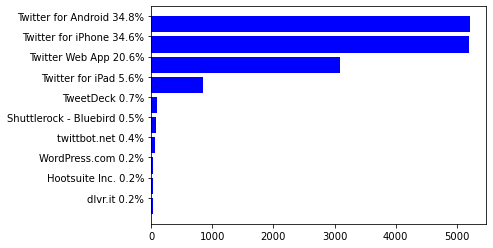

In [9]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
dataset.source_name = dataset.source.apply(get_source_name)

source_counts = dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)


fr       105
in       121
pt       160
ko       170
th       178
und      449
es       589
tr      1079
ja      1112
en     10525
Name: lang, dtype: int64

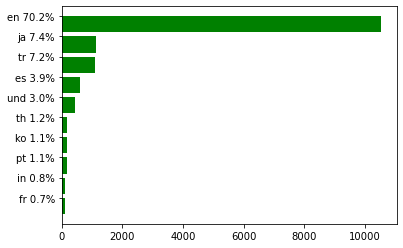

In [10]:
lang_counts = dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [11]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from  textblob import TextBlob

In [12]:
dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset1 = pd.DataFrame(dataset1)

is_dataset1=dataset1.lang=="en"
dataset1=dataset1[is_dataset1]
dataset1

,id,text,lang
0,1433640064802856961,RT @OccupyDemocrats: BREAKING: Disney donates ...,en
1,1433640064811159553,How many more have to die before he and his en...,en
3,1433640065041944581,RT @julie_kelly2: 600 and counting. Do you thi...,en
4,1433640065813594115,RT @GS_Watson: *New* @TaxFoundation analysis o...,en
5,1433640066501414967,RT @mmpadellan: President Biden needs to lean ...,en
...,...,...,...
14991,1436698659597570062,RT @Magacita67: Doesn’t this infuriate you?😡 h...,en
14994,1436698660062969861,"RT @realLizUSA: ""To the great people of our Co...",en
14996,1436698660230868994,RT @NBCNews: President Biden starts full day o...,en
14997,1436698660272807939,RT @charliespiering: Getty captures Joe Biden ...,en


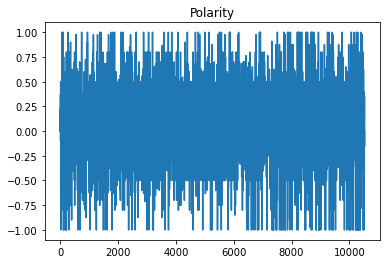

In [13]:
tweettext=dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

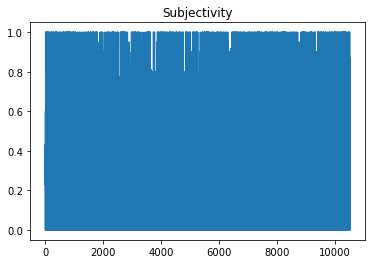

In [14]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [15]:
import statistics
statistics.mean(poltweet.polarity)

0.03555688186653893

In [16]:
import statistics
statistics.mean(poltweet.subjectivity)

0.29503439606052434

In [17]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [18]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = dataset1['text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
nltk.download('stopwords')
nltk.download('punkt')
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


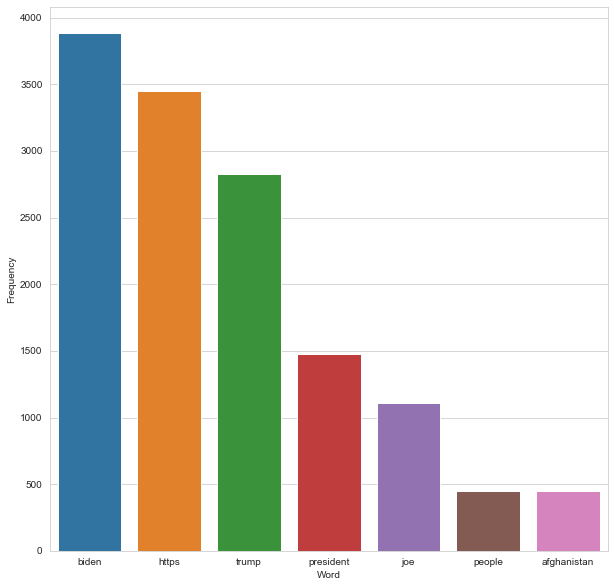

In [19]:
import seaborn as sns
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

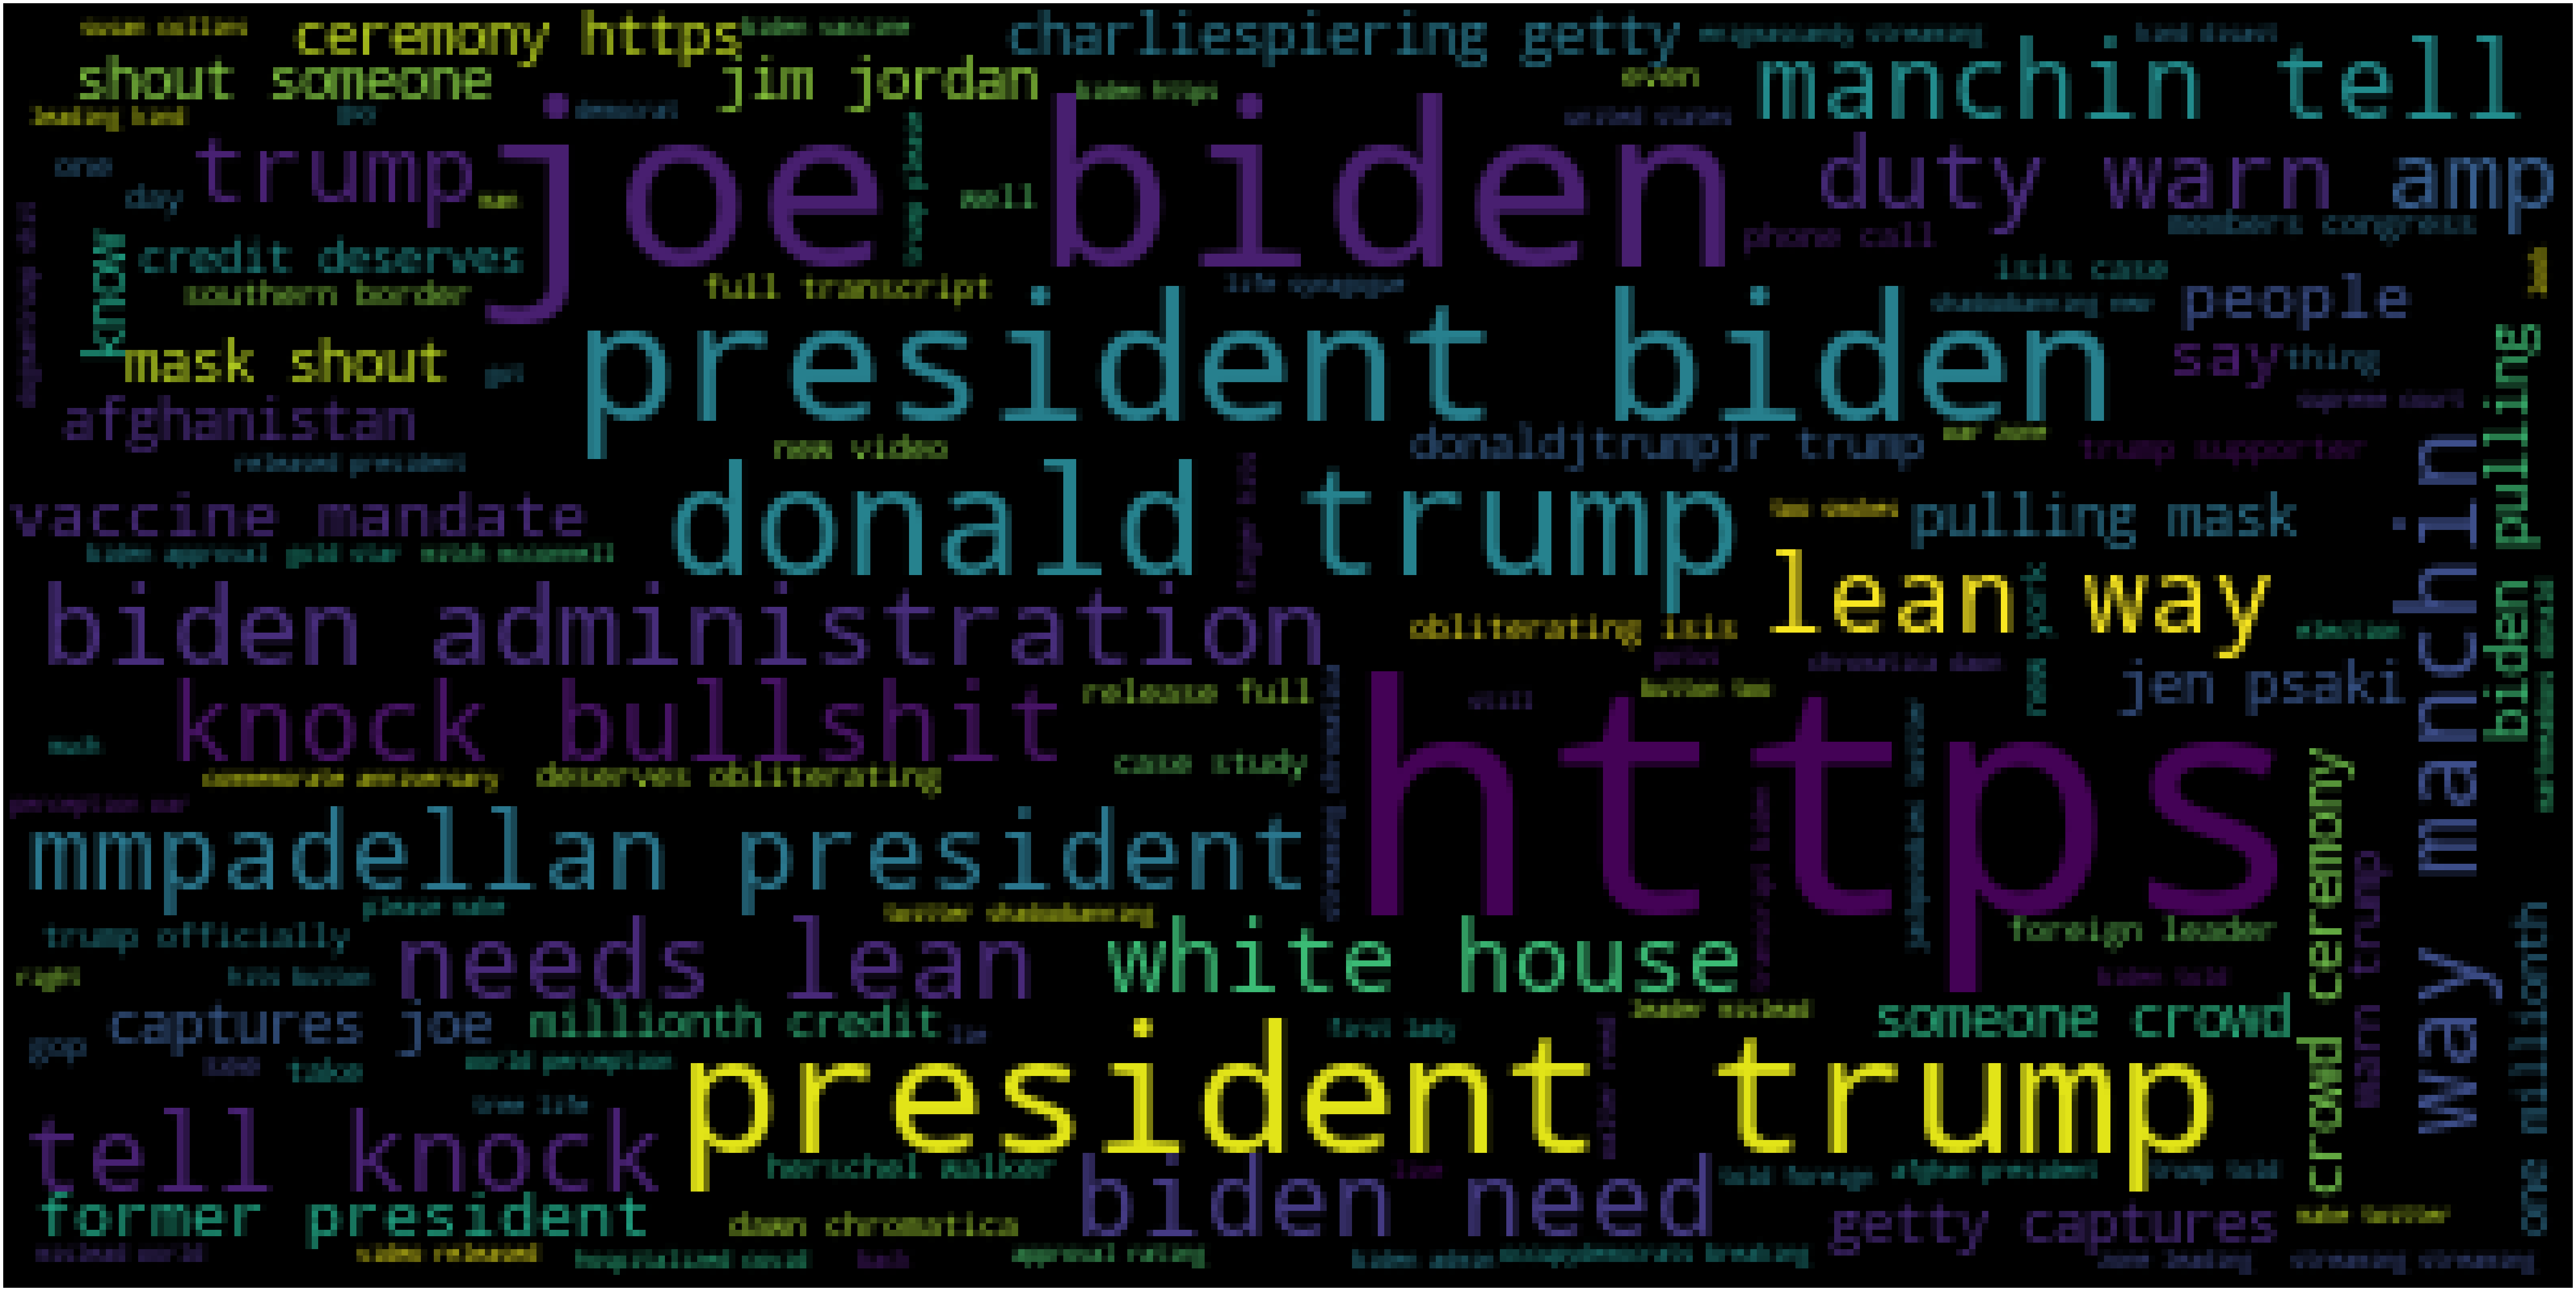

In [20]:
wc(cleaned_data_title,'black','Common Words' )

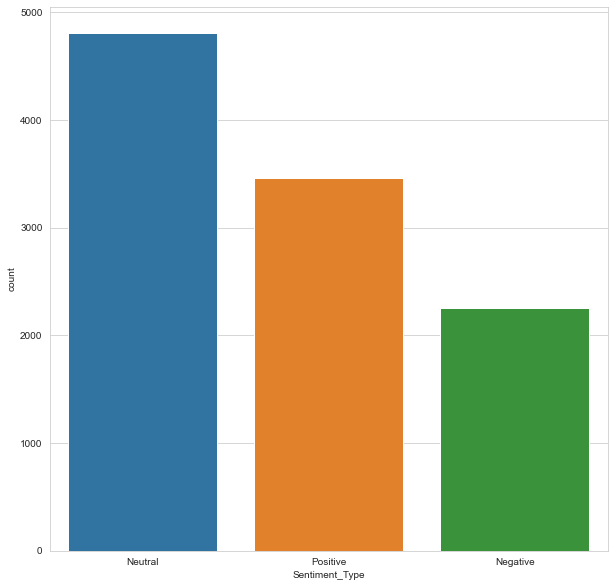

In [21]:
from textblob import TextBlob

bloblist_desc = list()

twit=dataset1['text'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)

In [22]:
import collections, numpy as np
a=twit_polarity_desc.Sentiment_Type
neut=np.count_nonzero(a == 'Neutral')
pos=np.count_nonzero(a == 'Positive')
neg=np.count_nonzero(a == 'Negative')
popularity='{0:.2f}'.format((((neut*0.5)+(pos)+(neg*0))/(neut+pos+neg))*100)
popularity

'55.71'